# Примеры к лекции 11. Кратковременное дискретное преобразование Фурье (STFT)

Лекции по курсу "Дискретные преобразования сигналов", 3 курс ФРКТ МФТИ 

In [1]:
import numpy as np # импорт бибилиотеки numpy
import matplotlib.pyplot as plt # импорт модуля matplotlib.pyplot
from scipy import signal
import scipy.io.wavfile
# Требуемые файлы
# vibraphone-loop-1.wav
# vibraphone-scale.wav

In [2]:
# Если используете Jupyter, то установите backend notebook
%matplotlib notebook

In [3]:
# Если используете Google Colab, то установите backend inline
%matplotlib inline

Кратковременное дискретное преобразование Фурье (Discrete  STFT, англ. Discrete Short-time Fourier transform) можно задать формулой
$${{X}_{m}}[n]=\sum\limits_{k=mR}^{mR+M-1}{x}[k]w[k-mR]\exp \left( -j2\pi \frac{nk}{{{N}_{\text{FFT}}}} \right),$$
где 
* $w[k]$ — временное окно, 
* $m$ — порядковый номер сегмента, 
* $M$ — длина окна (сегмента), 
* ${{N}_{\text{FFT}}}$ – размерность ДПФ, 
* $R=M-L$ – единичный сдвиг окна, 
* $L$ — размер перекрытия. 

Это преобразование позволяет осуществлять ДПФ-анализ на коротких интервалах времени. Для графического отображения результатов данного преобразования часто используется представление в виде графика с двумя осями, где по горизонтальной оси отображается время (или номер кадра $m$), по вертикальной — соответствующие частоты, а цветом отображается $|{{X}_{m}}[n]|$, $|{{X}_{m}}[n]{{|}^{2}}$ (в случае спектрограммы), или фазовая часть ${{X}_{m}}[n]$.


### Функция scipy.signal.stft

`scipy.signal.stft(x, fs=1.0, window='hann', nperseg=256, noverlap=None, nfft=None, detrend=False, return_onesided=True, boundary='zeros', padded=True, axis=-1, scaling='spectrum')` Расчет кратковременного дискретного преобразования Фурье (STFT)

**Основные параметры:**

`x` *array_like* Отсчеты сигнала. 

`fs` *float, optional* Частота дискретизации. 

`window` *str or tuple or array_like, optional* Используемое окно. Задается в виде параметров для функции `get_window` (без указания длины) или в виде массива отсчетов окна. По умолчанию генерируется окно Ханна. 

`nperseg` *int, optional* Длина сегмента $M$ (длина окна). По умолчанию 256.

`noverlap` *int, optional* Число точек в перекрытии $L$. По умолчанию, используется 50% перекрытие. 

`nfft` *int, optional* Размерность ДПФ сегментов.

Описание параметров `detrend`, `return_onesided`, `boundary`, `padded` , `axis`, `scaling: {‘spectrum’, ‘psd’}` можно найти в API reference SciPy. 

**Returns:**
`f` *ndarray* Массив частот спектрограммы.

`t` *ndarray* Массив времен спектрограммы.

`Zxx` *ndarray* Значения STFT.

### Пример построения спектрограммы

In [4]:
import numpy as np # импорт бибилиотеки numpy
import matplotlib.pyplot as plt # импорт модуля matplotlib.pyplot
from scipy import signal
import scipy.io.wavfile
from IPython.display import Audio

fs, x = scipy.io.wavfile.read('vibraphone-loop-1.wav')
if x.shape[1]>1:
    x=x[:, 0] # берем левый канал в случае, если wav-файл — стереозапись 
Audio('./vibraphone-loop-1.wav')

C:\Users\torma\AppData\Local\Temp\ipykernel_3948\3988832101.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, x = scipy.io.wavfile.read('vibraphone-loop-1.wav')


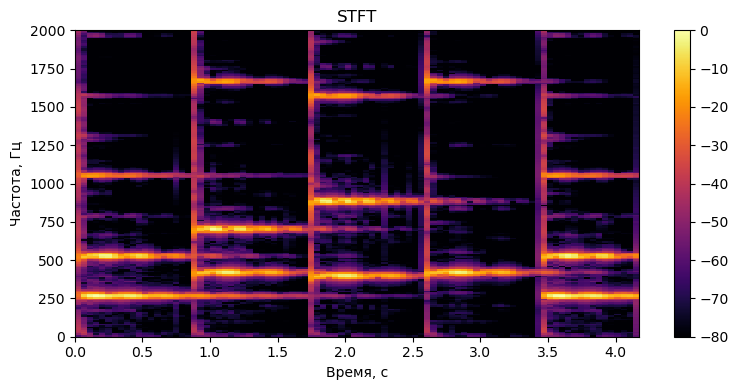

In [5]:
plt.figure(figsize=[8, 4], dpi=100)
f, t, Zxx = signal.stft(x, fs=fs, window=('hann'), nperseg=4000, noverlap=2000, nfft=2**12)
plt.pcolormesh(t, f,  20*np.log10(np.abs(Zxx[:-1, :-1])/np.max(abs(Zxx))), vmin=-80, cmap=plt.get_cmap('inferno'), shading='flat')
plt.colorbar()
plt.ylim((0, 2000))
plt.title('STFT')
plt.ylabel('Частота, Гц')
plt.xlabel('Время, с')
plt.tight_layout()

Разрешение по времени для STFT равно длине единичного сдвига окна в секундах, т.е. $R/{{f}_{\text{s}}}$. 

Разрешение по частоте обусловлено двумя параметрами.

* Сеткой частот ДПФ $\Delta f={{f}_{\text{s}}}/{{N}_{\text{FFT}}}$, где ${{N}_{\text{FFT}}}$— размерность ДПФ. Это разрешение можно улучшить без изменения длины кадра — путем добавления нулевых отсчетов. 

* Шириной главного лепестка оконной функции. Как правило, этот параметр зависит от длины окна $M.$


###  Проверка условий COLA(R) и NOLA(R)

По опредлению, окно $w[k]$ обладает свойством COLA(R), если 
$\underset{m=-\infty }{\overset{\infty }{\sum }}\,w[k-mR]=const \ \forall k\in \mathbf{Z}$.

In [6]:
from scipy import signal
signal.check_COLA(window=signal.get_window('hann', 4000), nperseg=4000, noverlap=2000)

True

По опредлению, окно $w[k]$ обладает свойством NOLA(R), если 
$\underset{m=-\infty }{\overset{\infty }{\sum }}\,w[k-mR]^2 \neq 0\ \forall k\in \mathbf{Z}$.

In [7]:
signal.check_NOLA(window=signal.get_window('hann', 4000), nperseg=4000, noverlap=2000)

True

### Вычисление обратного преобразования

Вычисление обратного преобразования можно провести с помощью функции `scipy.signal.istft`.

In [8]:
t1, x1 =  signal.istft(Zxx, fs=fs, window=('hann'), nperseg=4000, noverlap=2000, nfft=2**12)
x1

array([-9.09494702e-10,  4.54747126e-09, -3.63801471e-09, ...,
        6.82084419e-10,  1.25055381e-09,  4.54747631e-10])

### Пример. Формирование спектрограммы  ЛЧМ - сигнала

Рассмотрим сигнал, частота которого изменяется по линейному закону:

$$f(t) = f_0 + (f_1 - f_0) t / t_1$$

In [9]:
fs=500
f0=1
f1=80
t=np.arange(0, 2, 1/fs)
x = signal.chirp(t, f0=f0, f1=f1, t1=2, method='linear')

Формирование спектрограммы  ЛЧМ - сигнала без перекрытия сегментов. 

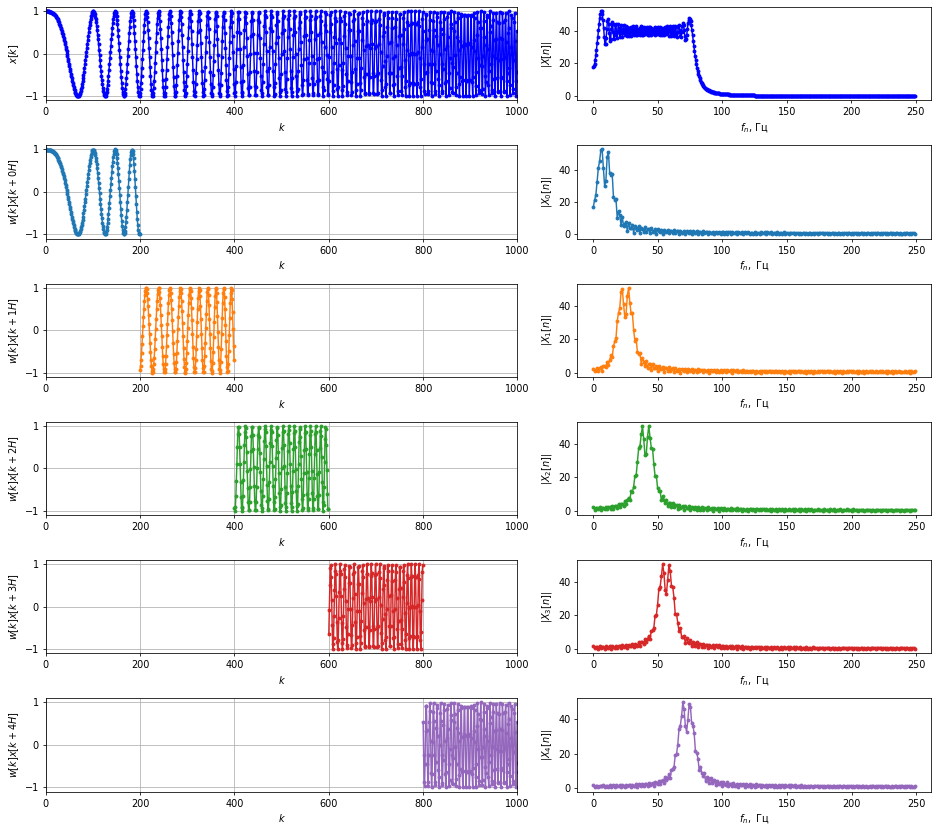

In [10]:
plt.figure(figsize=[13.5, 12], dpi=70)
nseg=5
nperseg=200
noverlap=0
from matplotlib import gridspec
gs = gridspec.GridSpec(nseg+1, 2, width_ratios=[8, 6])

plt.subplot(gs[0])
plt.plot(np.arange(x.size), x, '.-b')
plt.xlim([0, x.size])
plt.tight_layout()
plt.grid()
plt.ylabel('$x[k]$')
plt.xlabel('$k$')

plt.subplot(gs[1])
X_n=np.fft.fft(x)
plt.plot(np.arange(X_n.size//2)*fs/X_n.size, abs(X_n[0:X_n.size//2]), '.-b')
plt.ylabel('$|X[n]|$')
plt.xlabel('$f_n$, Гц')

for u in range(nseg):
    plt.subplot(gs[u*2+2])
    y=x[(nperseg-noverlap)*u:(nperseg-noverlap)*u+nperseg]*signal.windows.boxcar(nperseg, sym=False)
    plt.plot(np.arange((nperseg-noverlap)*u, (nperseg-noverlap)*u+nperseg), y, '.-C%i' %u)
    plt.xlim([0, x.size])
    plt.ylabel('$w[k]x[k+%iH]$' %u)
    plt.xlabel('$k$')
    plt.grid()
    plt.yticks([-1, 0, 1])
    plt.tight_layout()
    
    plt.subplot(gs[u*2+3])
    X_n=np.fft.fft(y, 512)
    plt.plot(np.arange(X_n.size//2)*fs/X_n.size, abs(X_n[0:X_n.size//2]), '.-C%i'  %u)
    plt.ylabel('$|X_{%i}[n]|$' %u)
    plt.xlabel('$f_n,$ Гц')
    plt.tight_layout()

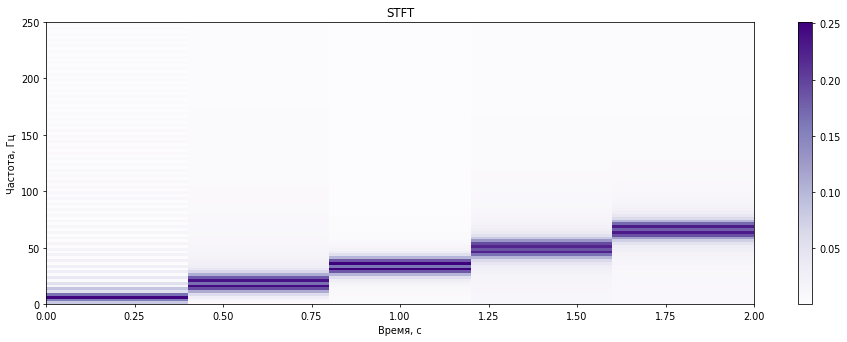

In [11]:
f, t, Zxx = signal.stft(x, fs=fs, window=('boxcar'), nperseg=200, noverlap=0, nfft=200)
plt.figure(figsize=[13.5, 5], dpi=70)
plt.pcolormesh(t, f, np.abs(Zxx[:-1, :-1]), cmap=plt.get_cmap('Purples'), shading='flat')
plt.colorbar()
plt.title('STFT')
plt.ylabel('Частота, Гц')
plt.xlabel('Время, с')
plt.tight_layout()
plt.show()

Формирование спектрограммы  ЛЧМ - сигнала с перекрытием сегментов 50%. 

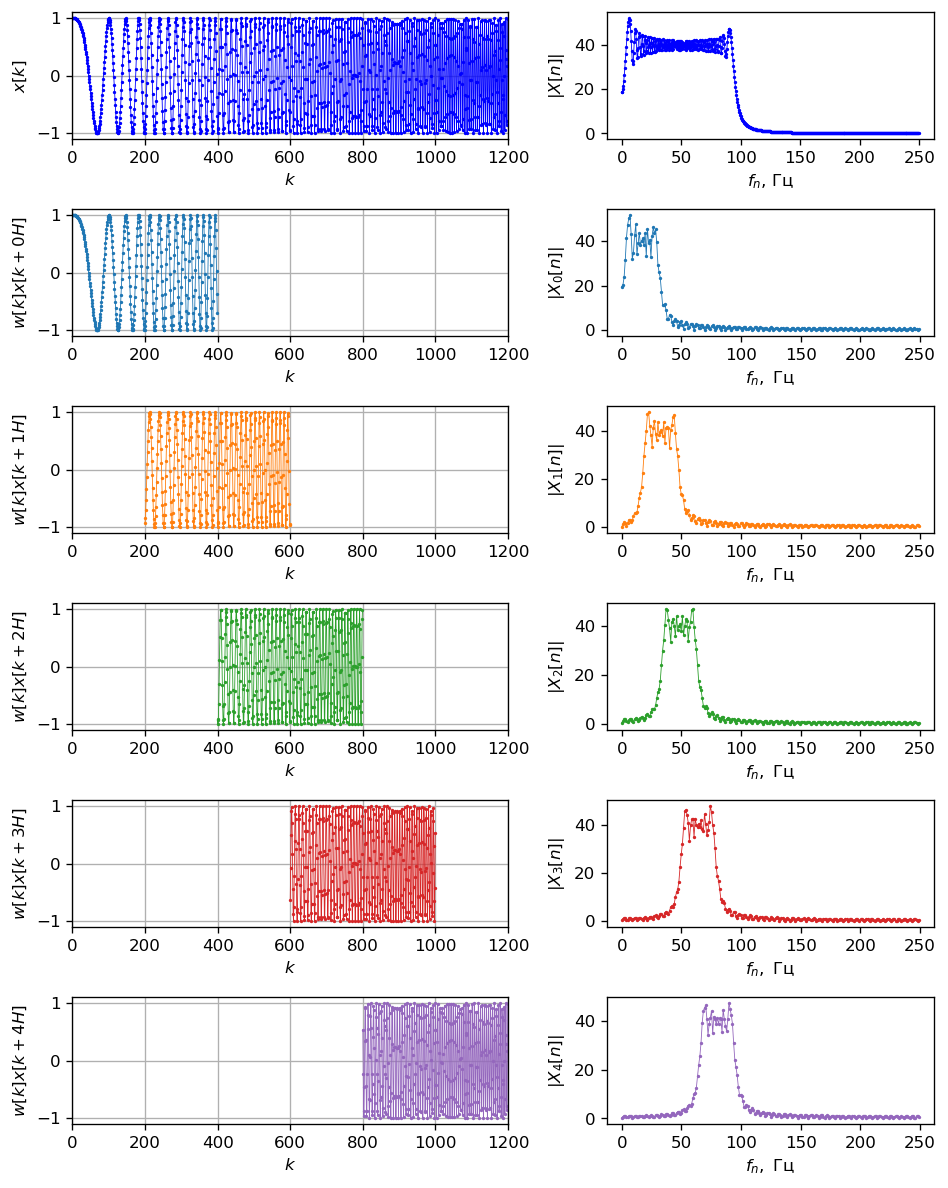

In [12]:
plt.figure(figsize=[8, 10], dpi=120)
fs=500
f0=1
f1=80
t=np.arange(0, 2.4, 1/fs)
x = signal.chirp(t, f0=f0, f1=f1, t1=2, method='linear')

nseg=5
nperseg=400
noverlap=200
from matplotlib import gridspec
gs = gridspec.GridSpec(nseg+1, 2, width_ratios=[8, 6])
linewidth=0.5
ms=2
plt.subplot(gs[0])
plt.plot(np.arange(x.size), x, '.-b', linewidth=0.5, ms=ms)
plt.xlim([0, x.size])
plt.tight_layout()
plt.grid()
plt.ylabel('$x[k]$')
plt.xlabel('$k$')

plt.subplot(gs[1])
X_n=np.fft.fft(x)
plt.plot(np.arange(X_n.size//2)*fs/X_n.size, abs(X_n[0:X_n.size//2]), '.-b', linewidth=linewidth, ms=ms)
plt.ylabel('$|X[n]|$')
plt.xlabel('$f_n$, Гц')

for u in range(nseg):
    plt.subplot(gs[u*2+2])
    y=x[(nperseg-noverlap)*u:(nperseg-noverlap)*u+nperseg]*signal.windows.boxcar(nperseg, sym=False)
    plt.plot(np.arange((nperseg-noverlap)*u, (nperseg-noverlap)*u+nperseg), y, '.-C%i' %u, linewidth=linewidth, ms=ms)
    plt.xlim([0, x.size])
    plt.ylabel('$w[k]x[k+%iH]$' %u)
    plt.xlabel('$k$')
    plt.grid()
    plt.yticks([-1, 0, 1])
    plt.tight_layout()
    
    plt.subplot(gs[u*2+3])
    X_n=np.fft.fft(y, 512)
    plt.plot(np.arange(X_n.size//2)*fs/X_n.size, abs(X_n[0:X_n.size//2]), '.-C%i'  %u, linewidth=linewidth, ms=ms)
    plt.ylabel('$|X_{%i}[n]|$' %u)
    plt.xlabel('$f_n,$ Гц')
    plt.tight_layout()

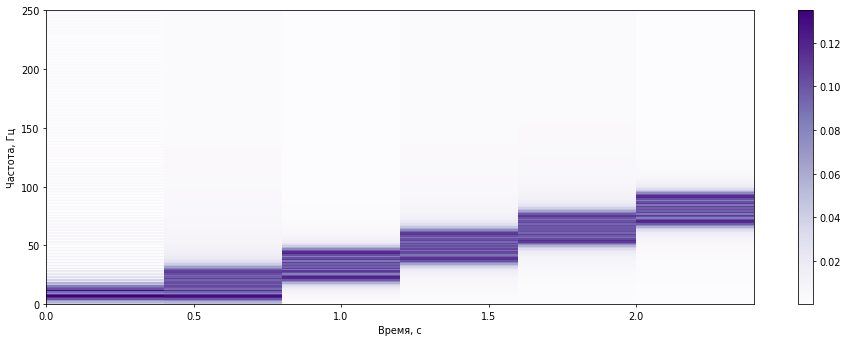

In [13]:
f, t, Zxx = signal.stft(x, fs=fs, window=('boxcar'), nperseg=400, noverlap=200, nfft=400)
plt.figure(figsize=[13.5, 5], dpi=70)
plt.pcolormesh(t, f, np.abs(Zxx[:-1, :-1]), cmap=plt.get_cmap('Purples'), shading='flat')
plt.colorbar()
plt.ylabel('Частота, Гц')
plt.xlabel('Время, с')
plt.tight_layout()

### Пример. Влияние выбора окна. 

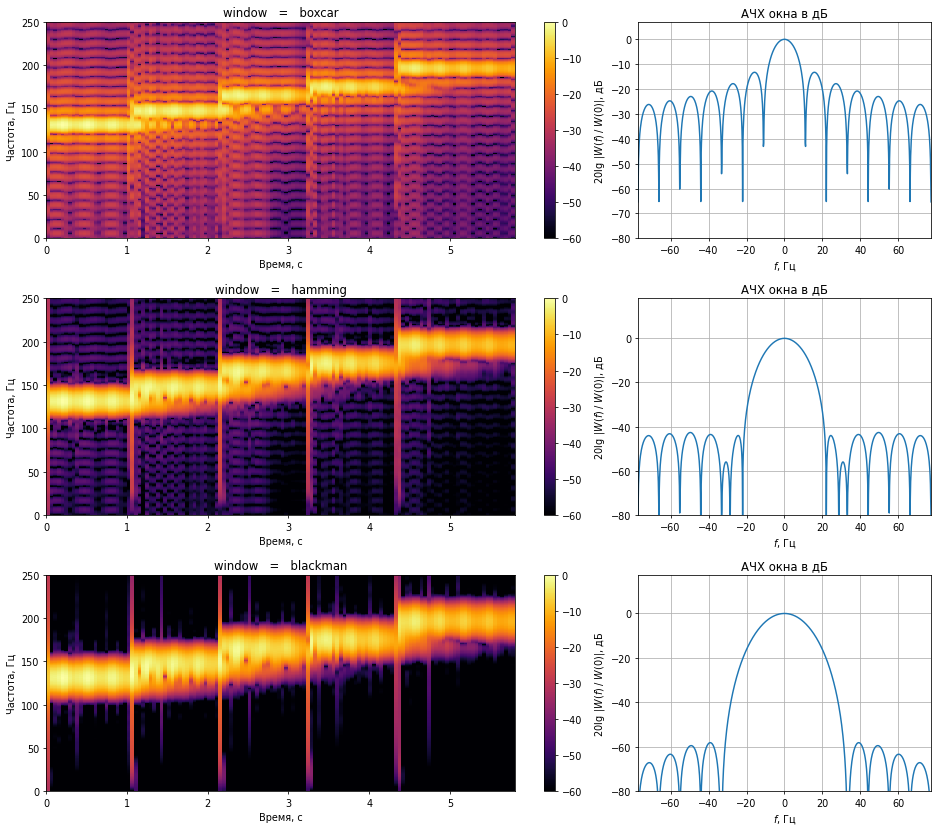

In [14]:
import scipy.io.wavfile
fs, x = scipy.io.wavfile.read('vibraphone-scale.wav')
x=x[:, 0]
N_dtft=2**18

windows=['boxcar', 'hamming', 'blackman']
gs = gridspec.GridSpec(len(windows), 2, width_ratios=[8, 4])
u=0
plt.figure(figsize=[13.5, 12], dpi=70)
for window in windows: #'bartlett', 'hann', 
    plt.subplot(gs[u*2], title='window   =   %s' % (window))
    nperseg=4000
    noverlap=nperseg//2
    f, t, Zxx = signal.stft(x, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap, nfft=2**16)
    plt.pcolormesh(t, f,  20*np.log10(np.abs(Zxx[:-1, :-1])/np.max(abs(Zxx))), vmin=-60, cmap=plt.get_cmap('inferno'), shading='flat')
    plt.colorbar()
    plt.ylim((0, 250))
    plt.ylabel('Частота, Гц')
    plt.xlabel('Время, с')
    plt.tight_layout()
    plt.subplot(gs[u*2+1], title='АЧХ окна в дБ')
    w=signal.windows.get_window(window, Nx=nperseg)
    f, W = np.linspace(-fs/2, fs/2, num=N_dtft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(w, N_dtft))
    with np.errstate(divide='ignore'): # Отключаем RuntimeWarning
        plt.plot(f, 20*np.log10(abs(W)/max(abs(W))))
    plt.ylim(ymin=-80)
    plt.xlim([-7*fs/nperseg, 7*fs/nperseg])
    plt.grid()
    plt.xlabel('$f$, Гц')
    plt.ylabel('$20 \lg \; |W(f)\; / \;W(0)|$, дБ')
    plt.tight_layout()
    u+=1   

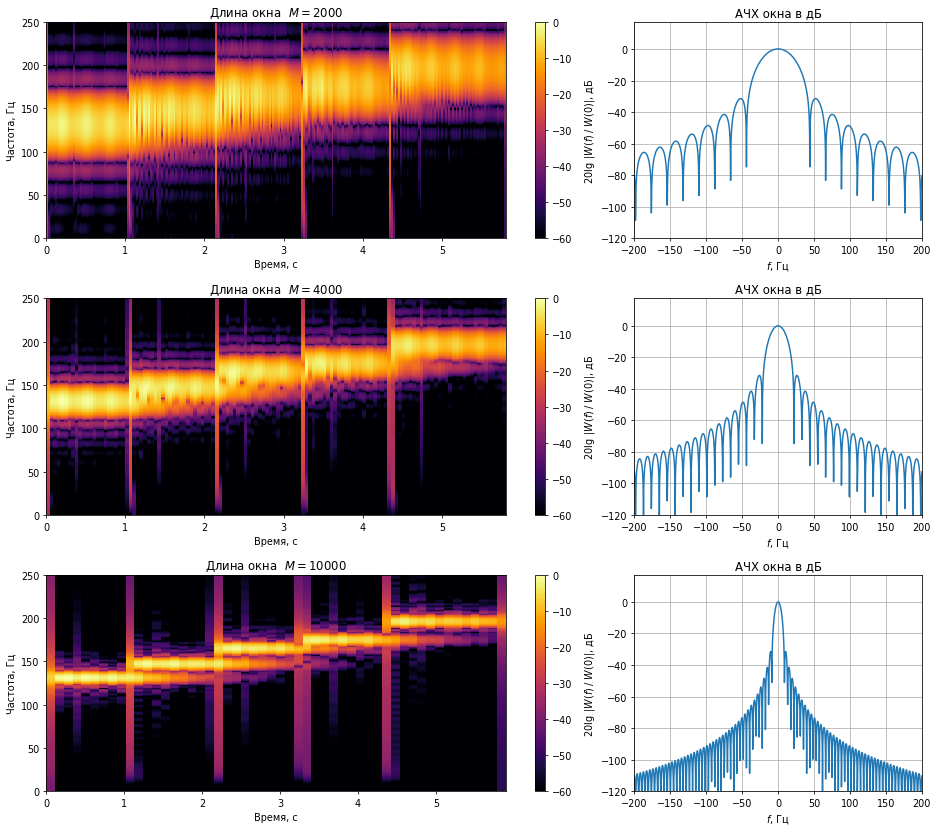

In [15]:
import scipy.io.wavfile
fs, x = scipy.io.wavfile.read('vibraphone-scale.wav')
x=x[:, 0]
N_dtft=2**18

window='hann'

gs = gridspec.GridSpec(len(windows), 2, width_ratios=[8, 4])
u=0
plt.figure(figsize=[13.5, 12], dpi=70)
for nperseg in [2000, 4000, 10000]: 
    plt.subplot(gs[u*2], title='Длина окна  $M=%s$' % (nperseg))
    noverlap=nperseg//2
    f, t, Zxx = signal.stft(x, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap, nfft=2**16)
    plt.pcolormesh(t, f,  20*np.log10(np.abs(Zxx[:-1, :-1])/np.max(abs(Zxx))), vmin=-60, cmap=plt.get_cmap('inferno'), shading='flat')
    plt.colorbar()
    plt.ylim((0, 250))
    plt.ylabel('Частота, Гц')
    plt.xlabel('Время, с')
    plt.tight_layout()
    plt.subplot(gs[u*2+1], title='АЧХ окна в дБ')
    w=signal.windows.get_window(window, Nx=nperseg)
    f, W = np.linspace(-fs/2, fs/2, num=N_dtft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(w, N_dtft))
    with np.errstate(divide='ignore'): # Отключаем RuntimeWarning
        plt.plot(f, 20*np.log10(abs(W)/max(abs(W))))
    plt.ylim(ymin=-120)
    plt.xlim([-200, 200])
    plt.grid()
    plt.xlabel('$f$, Гц')
    plt.ylabel('$20 \lg \; |W(f)\; / \;W(0)|$, дБ')
    plt.tight_layout()
    u+=1   